# Working with text in Py5canvas

In [1]:
from py5canvas import *

# Some inspiration
Here are some resources that may be useful if you are inspired to work with text/typography:
- [Mit media lab lectures on computational typography](https://www.media.mit.edu/posts/lunch-lectures-computational-typography/)
- [Letterform archive](https://www.instagram.com/letterformarchive/)
- [Spacetype](https://spacetypeco.com/work)
- [Just van Rossum](https://www.instagram.com/justvanrossum/?hl=en)
- [Erik van Blockland, Beowolf random typeface](https://letterror.com/fonts/randomfonts.html)
- [Douglas Hofstadter and co., Letter spirit](https://gwern.net/doc/design/typography/1993-hofstadter.pdf)
- [Semi-asemic glyphs](https://www.enist.org/semi-asemic-glyphs/)
- [Visible language journal](https://journals.uc.edu/index.php/vl/issue/archive)
    - A treasure trove of scholarly articles on typography and related topics
    - [This issue](https://journals.uc.edu/index.php/vl/issue/view/361/179) was written by calligraphers eniterly with calligraphy
- [Zi2zi calligraphy generation neural network](https://kaonashi-tyc.github.io/2017/04/06/zi2zi.html), a bit dated but still very cool

Similarly to Processing and P5js, Py5canvas allows you to draw text using the `text` command. It takes a string (e.g. `"Hello world"` as an input followed by the position of the text as a pair of coordinates or a vector/tuple.

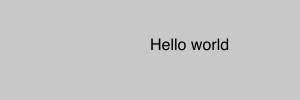

In [46]:
create_canvas(300, 100)
no_stroke()
fill(0)
#text("Hello world", width/2, height/2) # or
text("Hello world", center) 
show()

Text takes the current drawing settings into account, e.g. `stroke` and `fill`. You can set the text size, horizontal and vertical alignment and font with the `text_size`, `text_align` and `text_font` commands. E.g. 

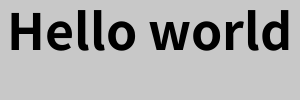

In [4]:
create_canvas(300, 100)
no_stroke()
fill(0)
text_font('./NotoSansSC-Bold.ttf')
text_size(50)
text_align(CENTER) 
text("Hello world", center) 
show()

The `text_align` command has one or two arguments. The first one is the horizontal text alignment, it can be either of `LEFT`, `RIGHT` or `CENTER`. The second paramter is the vertical text alignment and it is optional. It can be either of `BASELINE` (the default), `TOP`, `BOTTOM` or `CENTER`. See the [Processing reference](https://processing.org/reference/textAlign_.html) for additional info on how the text align parameters work.

In Python strings are sequences that can be iterated in a for loop alike lists or `range`. E.g. we have seen:

In [5]:
txt = 'Hello world'
i = 0
for c in txt:
    print(i, c)
    i += 1

0 H
1 e
2 l
3 l
4 o
5  
6 w
7 o
8 r
9 l
10 d


Here we loop over the characters in the `txt` string variable and keep count of where we are at in the list by incrementing a variable `i`. If we wanted to draw characters on a circle we could do:

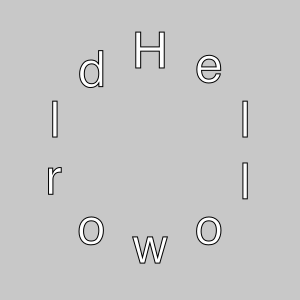

In [10]:
txt = "Hello world".replace(' ', '')
create_canvas(300, 300)
translate(center)
text_align(CENTER, CENTER)
text_size(50)
i = 0
for c in txt:
    angle = remap(i, 0, len(txt), 0, TWO_PI)
    pos = direction(angle-radians(90))*100
    text(c, pos)
    i += 1  # Increment `i` by 1 manually!
save('test.pdf')
show()

Notice two things: 
- The text goes clockwise from the right. 
    - We can change that by simply adding/subtracting an offset (a phase) to the angle inside `direction`, e.g. using `direction(angle + radians(-90))`. 
- There is a "gap" in the circle. This is because the space in the string is an actual character!

Python is extremely powerful when it comes to text manipulation (see [this reference](https://www.w3schools.com/python/python_ref_string.asp) for seeing string functionalities). E.g. you can replace any text/character in a Python string using the `.replace` method:

In [50]:
txt = "Hello world"
txt.replace(" ", "") # replace space " " with nothing ""

'Helloworld'

Or capitalize it:

In [51]:
txt.upper()

'HELLO WORLD'

# Modularity 
The example above uses the built-in `text` function to draw a single letter. We can create more complex patterns by placing the text drawing inside a custom function and exploring how this can be used. Putting the drawing code inside a function will lead to more tidy code and make exploration easier (note we are re-using the `txt` variable):

In [ ]:
def funky_text(txt, pos):
    push_matrix() 
    translate(pos)
    for i in range(5):
        push_matrix() # SAVE TRANSFORM
        rotate(i*0.1)
        translate(i*3, i*3)
        text(txt, 0, 0)
        pop_matrix() # RESET
    pop_matrix() 

Then

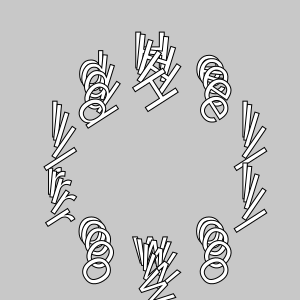

In [14]:
create_canvas(300, 300)
translate(center)
text_align(CENTER, CENTER)
text_size(50)
i = 0
for c in txt:
    angle = remap(i, 0, len(txt), 0, TWO_PI)
    pos = direction(angle + radians(-90))*100
    funky_text(c, pos)
    i += 1
show()

Notice that in the `funky_text` function we used a number of nested `push_matrix` and `pop_matrix`. The first pair saves the current transformation and moves your current origin `(0,0)` to the desired position. Then inside the `for` loop we want to transform the text based on the current value of `i` so we nest our transformations for each letter inside a second pair of push and pop

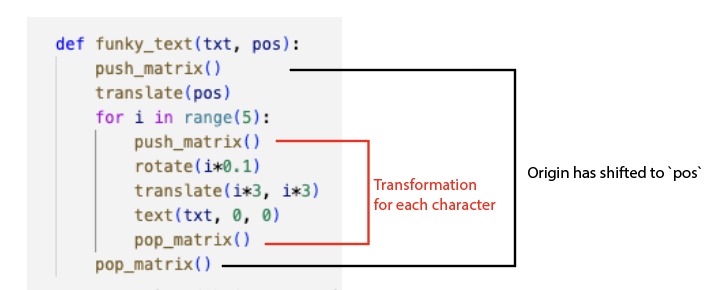




If we were to remove the second pair of push and pop, we would accumulate transformations.  In this way each time we exit one iteration of the loop we are sure we have the same transformation we had right outside of the loop

## Using functions as variables
Python functions can be also seen as variables, meaning that you can write a function as the above and assign it to a variable as you would do with numbers, strings or other Python types. E.g. if we write 

In [53]:
current_text_func = funky_text 

Now `current_text_func` is a new "pseudonym" for the `funky_text` function we originally defined:

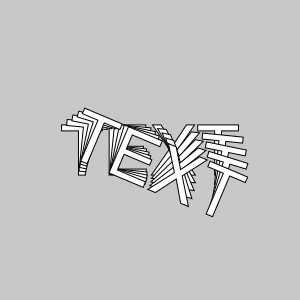

In [54]:
create_canvas(300, 300)
translate(center)
text_size(70)
text_align(CENTER, CENTER)
current_text_func('TEXT', (0, 0))
show()

This can be useful if you want to explore different options in your code. E.g. we can define another alternative function 

In [55]:
def funky_text_2(txt, pos):
    push_matrix() 
    translate(pos)
    scale(2) 
    for i in range(5):
        scale(0.8)
        text(txt, 0, 0)
    pop_matrix() 

Now we can create a list of functions and quickly switch between them by changing an index into a list as follows:

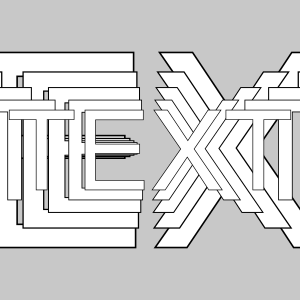

In [56]:
funcs = [funky_text, funky_text_2]
current_text_func = funcs[1]
create_canvas(300, 300)
translate(center)
text_size(170)
text_align(CENTER, CENTER)
current_text_func('TEXT', (0, 0))
show()

# Points along text

So far we have been drawing text as shapes, but what if we want to draw a shape for each point along a text outline? 

Py5canvas provides a function for this called `text_points`. It returns a sequence of points (vectors) that we can use to position things on the canvas. For example:


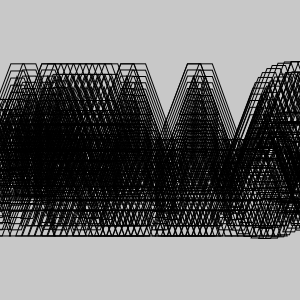

In [26]:
create_canvas(300, 300)
translate(center)
text_size(120)
no_fill()
text_align(CENTER, CENTER)
points = text_points('HELLO', 0, 0, 6)
for p in points:
    text('A', p) # circle(p, 10)
show()

The final parameter of the `text_points` function determines the spacing between consecutive points along the outline. You can use this to create different text-based compositions. For example how could you use other shapes instead of circles to create abstractions of the text?

You can perturb the points along the text outlines using a function that varies depending on the position of each point. For example we could perturb the points using Perlin noise:

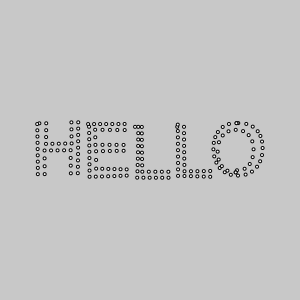

In [27]:
create_canvas(300, 300)
translate(center)
text_size(70)
text_align(CENTER, CENTER)
offset_amount = 10
points = text_points('HELLO', 0, 0, 6)
v = 0
for p in points:
    offset_x = remap(noise(v), 0, 1, -1, 1)*offset_amount
    # One is a phased version of the other
    offset_y = remap(noise(v+0.32), 0, 1, -1, 1)*offset_amount
    circle(p[0] + offset_x, p[1] + offset_y, 3)
    v += 0.01 # Increment 
show()